In [7]:
import matplotlib.pyplot as plt
import darwin
import pandas as pd
from importlib import reload
import salem

reload(salem)
reload(darwin)

<module 'darwin' from '/home/ben/projects/darwin/darwin.py'>

In [8]:
var = 'prcp'
experiment = 'rc_trop_ls_MM'
year = 1516

In [9]:
if "ls_prcp" in locals():
    del ls_prcp
files = darwin.glob_measurements()

ls_prcp = darwin.open_experiment(
    experiment=experiment, 
    variable = var,
    year = str(year),
    engine="xarray",
    decode_cf=True
)

Getting variable name translations


Getting variable name translations


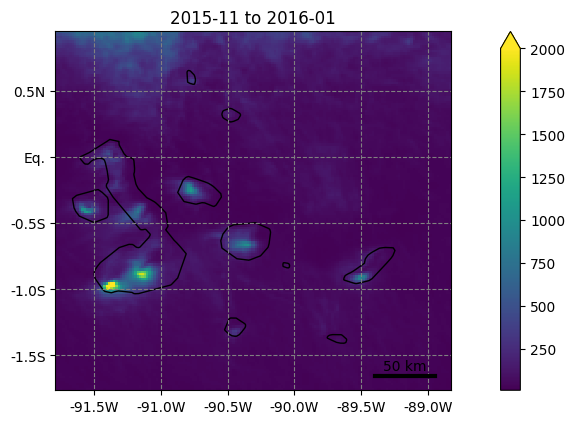

In [10]:
reload(darwin)
fig, ax = plt.subplots(figsize=(6,5))
# ls_prcp.plot_map(ax=ax, )
# ls_prcp.add_extracted_simulated_points_from_file(f"/home/ben/projects/darwin/{var}_bil.csv")
# ls_prcp.plot_stations(save=True)
ls_prcp = ls_prcp.remove_boundaries(40)
ls_prcp.wrf_product = ls_prcp.wrf_product.loc[dict(time=slice('2015-11-01', '2016-01-30'))]
ls_prcp.plot_map(ax=ax, aggregation="sum", save=True, stations=False, vmax=2000)
ax.set_title('2015-11 to 2016-01')
plt.savefig(f"{experiment}_prcp_map_{year}.png")
# del ls_prcp.wrf_product.attrs["PROJ_ENVI_STRING"]
# ls_prcp.wrf_product.salem.quick_map()
plt.show()

In [11]:
measured = pd.read_csv(f"/home/ben/projects/darwin/{var}_nn.csv", index_col=0)
measured.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ben/projects/darwin/prcp_nn.csv'

In [ ]:
ls_prcp.wrf_product

In [ ]:
_, ax = plt.subplots(figsize=(12, 10))
measured.plot(ax=ax)
# plt.savefig('stations_extracted_q2.png')

In [ ]:
'+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_data.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-09-30']
ds.head()

In [ ]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [ ]:
files = darwin.glob_measurements()
files

In [ ]:
import pandas as pd
ds = pd.read_csv("/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_data.csv", parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [ ]:
import xarray as xr
def open_dataset(file, pyproj_srs='+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'):
    ds = xr.open_dataset(
        file,
        decode_cf=False
    )
    split = file.split('/')[-1].split('_')
    var = split[-2]
    if var == 'lu':
        var = split[-2] + '_' + split[-1].split('.')[0]
    ds[var].attrs['pyproj_srs'] = pyproj_srs
    return ds

In [ ]:
reload(darwin)
ds = darwin.WrfDataset(ds)

In [ ]:
from metpy.calc import relative_humidity_from_mixing_ratio
from metpy.units import units

version = 'rc_trop_ls_MM'
year= '2022'
q2 = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_q2_{year}.nc")
t2 = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_t2_{year}.nc")
psfc = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_psfc_{year}.nc")
q2 = q2["q2"] * units("kg/kg")
t2 = t2["t2"] * units("K")
psfc_da = psfc["psfc"] * units("mbar")

In [ ]:
rh = relative_humidity_from_mixing_ratio(psfc_da, t2, q2)
fig, ax = plt.subplots(figsize=(12, 10))
rh.mean(dim="time", skipna=True, keep_attrs=True).plot(ax=ax, cmap="Blues")
ax.xlabel=""
ax.ylabel=""
plt.savefig("rc_trop_ls_rh_map.png")
plt.show()

In [ ]:
rh.name = 'rh'
rh= psfc.merge(rh)

In [ ]:
rh.rh.attrs = rh.psfc.attrs

In [ ]:
rh = rh.drop_vars(psfc)
rh.attrs['VARNAME'] = 'rh'
rh.to_netcdf('/home/ben/data/GAR/rc_trop_ls_MM/rc_trop_ls_MM_d02km_d_2d_rh_2022.nc')

In [ ]:
reload(darwin)
ls_hgt = darwin.open_experiment(
    from_path = '/home/ben/data/GAR/rc_trop_ls_vert43/',
    engine="xarray",
    decode_cf=True
)

In [ ]:
# hgt = ls_hgt.remove_boundaries(20)
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

terrain = mpl.colormaps['terrain'].resampled(32)
custom_terrain = ListedColormap([
    terrain(0), 
    terrain(0.25), 
    terrain(0.35), 
    terrain(0.4), 
    terrain(0.45), 
    terrain(0.5), 
    terrain(0.55),
    terrain(0.6),
    terrain(0.65),
    terrain(0.7), 
    terrain(0.75),
    terrain(0.8)
])

hgt = salem.open_wrf_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/static/rc_trop_ls_d10km_static_hgt.nc")
fig, ax = plt.subplots(figsize=(12, 10))
hgt.where(hgt.hgt > 1, -151).salem.quick_map('hgt', cmap=custom_terrain)
# hgt.salem.quick_map('hgt', cmap=custom_terrain)
plt.savefig('terrain.png')

In [ ]:
grid = salem.grid_from_dataset(hgt)
smap = salem.Map(grid)
smap.set_rgb(natural_earth='hr')

# smap.set_lonlat_contours(interval=0)
smap.set_scale_bar()
fig, ax = plt.subplots()
smap.visualize(ax=ax, addcbar=False)

smap.set_cmap('terrain')
smap.append_colorbar(ax=ax)
smap.set_data(hgt.where(hgt.hgt > 1, np.nan).to_array())
smap.visualize(ax=ax, title='WRF model topography')
plt.show()